# Knowledge Graph Generation and LLM Integration

In [1]:
print("we are starting up. Knowledge graph. ")

we are starting up. Knowledge graph. 


In [2]:
!pip install flask networkx matplotlib
!pip install faker
!pip install openai==0.28
!pip install transformers rdflib spacy
!python -m spacy download en_core_web_sm

  Obtaining dependency information for flask from https://files.pythonhosted.org/packages/61/80/ffe1da13ad9300f87c93af113edd0638c75138c42a0994becfacac078c06/flask-3.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for itsdangerous>=2.1.2 from https://files.pythonhosted.org/packages/04/96/92447566d16df59b2a776c0fb82dbc4d9e07cd95062562af01e408583fc4/itsdangerous-2.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for click>=8.1.3 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for blinker>=1.6.2 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.7 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.w

In [3]:
from transformers import pipeline
from rdflib import Graph, URIRef, Literal, Namespace
import spacy

/Users/jainilpatel/PycharmProjects/Exercise-Correction/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
from rdflib import Graph, Namespace, URIRef, Literal
from faker import Faker
import random

# Initialize the Faker generator
fake = Faker()

# Initialize RDF graph and define namespaces
g = Graph()
pain_mesh = Namespace("pain")
exercise = Namespace("exercise")
person_name = Namespace("name")
reps = Namespace("reps")
sets = Namespace("sets")


In [5]:
# Cardio exercises
cardio_exercises = [
    "Running", "Treadmill workouts", "Cycling (stationary bike)", "Jump rope", "Rowing machine",
    "Elliptical machine workouts", "Stair climbing", "High-Intensity Interval Training (HIIT)",
    "Aerobics", "Swimming", "Spinning", "Mountain climbers", "Burpees", "Sprints", "Jumping jacks",
    "Battle ropes", "Shadowboxing"
]

# Strength training exercises (Weight lifting)
strength_training_exercises = [
    "Bench press", "Barbell squats", "Deadlifts", "Overhead press", "Dumbbell curls", "Tricep dips",
    "Dumbbell rows", "Chest fly", "Lat pulldowns", "Leg press", "Bicep curls", "Arnold press",
    "Incline bench press", "Hammer curls", "Lateral raises", "Shrugs", "Cable crossovers",
    "Romanian deadlift", "Kettlebell swings", "Clean and press", "Trap bar deadlifts", "Seated rows",
    "Sumo deadlifts", "Front squats", "Glute bridges", "Reverse lunges", "Bulgarian split squats",
    "Hex bar deadlifts"
]

# Bodyweight exercises
bodyweight_exercises = [
    "Push-ups", "Pull-ups", "Chin-ups", "Bodyweight squats", "Lunges", "Planks", "Side planks",
    "Burpees", "Dips", "Jump squats", "Mountain climbers", "Russian twists", "Jump lunges",
    "Box jumps", "Step-ups", "Inchworms", "Superman exercise", "Wall sits", "Bear crawls",
    "Crab walks"
]

# Core exercises (Abdominal/Obliques)
core_exercises = [
    "Sit-ups", "Crunches", "Leg raises", "Bicycle crunches", "Russian twists", "Hanging leg raises",
    "Flutter kicks", "Side planks with leg raises", "Mountain climbers", "Ab wheel rollouts",
    "Reverse crunches", "V-ups", "Hollow body hold", "Cable crunches", "Medicine ball twists",
    "Toe touches", "Hanging knee raises", "Plank to push-up", "L-sits"
]

# Lower body exercises
lower_body_exercises = [
    "Squats", "Deadlifts", "Lunges", "Leg press", "Calf raises", "Bulgarian split squats",
    "Glute bridges", "Step-ups", "Hamstring curls", "Hip thrusts", "Lateral lunges",
    "Donkey kicks", "Single-leg deadlifts", "Sissy squats", "Cable kickbacks", "Pistol squats",
    "Box step-ups", "Frog jumps"
]

# Upper body exercises
upper_body_exercises = [
    "Bench press", "Push-ups", "Overhead press", "Dumbbell rows", "Pull-ups", "Chin-ups",
    "Dips", "Chest fly", "Tricep extensions", "Bicep curls", "Cable rows", "Lateral raises",
    "Shrugs", "Pec deck machine", "Arnold press", "Chest dips", "Hammer curls", "Bent-over rows",
    "Face pulls"
]

# Flexibility and mobility exercises
flexibility_mobility_exercises = [
    "Yoga poses", "Stretching exercises", "Dynamic stretches", "Foam rolling", "Hip flexor stretches",
    "Thoracic spine mobility drills", "Ankle mobility drills", "Pigeon pose", "Cat-cow stretch",
    "Shoulder dislocates"
]

# Plyometric exercises (Explosive movements)
plyometric_exercises = [
    "Box jumps", "Jump squats", "Plyo push-ups", "Jump lunges", "Depth jumps", "Burpees",
    "Lateral jumps", "Tuck jumps", "Clap push-ups", "Broad jumps", "Skater jumps", "Single-leg hops"
]

# Kettlebell exercises
kettlebell_exercises = [
    "Kettlebell swings", "Kettlebell clean and press", "Kettlebell snatches", "Kettlebell goblet squats",
    "Turkish get-ups", "Kettlebell deadlifts", "Kettlebell thrusters", "Kettlebell lunges",
    "Kettlebell Russian twists", "Kettlebell figure-8"
]

# Functional training exercises
functional_training_exercises = [
    "Farmer's carry", "Medicine ball slams", "Sandbag training", "Tire flips", "Sledgehammer slams",
    "Battle rope exercises", "Bear hug squats", "Medicine ball wall throws"
]

# Combining all the exercises into a master list
all_exercises = (cardio_exercises + strength_training_exercises + bodyweight_exercises + core_exercises +
                 lower_body_exercises + upper_body_exercises + flexibility_mobility_exercises +
                 plyometric_exercises + kettlebell_exercises + functional_training_exercises)

# Print the total number of exercises
print(f"Total exercises listed: {len(all_exercises)}")


Total exercises listed: 161


In [6]:
# Example arrays for exercises
before_exercises = all_exercises

after_exercises = all_exercises

# Generate random entries
num_entries = 50000  # Specify how many entries you want
for _ in range(num_entries):
    person_name_variable = fake.name()
    body_pain_area = random.choice(["Lower back", "Upper back", "Knees", "Shoulders", "Neck"])
    john = URIRef(person_name[person_name_variable.replace(" ", "_")])  # Replace spaces in name with underscores
    g.add((john, pain_mesh['Pain'], Literal(body_pain_area + " pain")))
    g.add((john, exercise['PreviousExercise'], Literal(random.choice(before_exercises))))
    g.add((john, exercise['RecommendedExercise'], Literal(random.choice(after_exercises))))
    g.add((john, sets['Sets'], Literal(random.randint(1, 15))))
    g.add((john, reps['Reps'], Literal(random.randint(1, 15))))



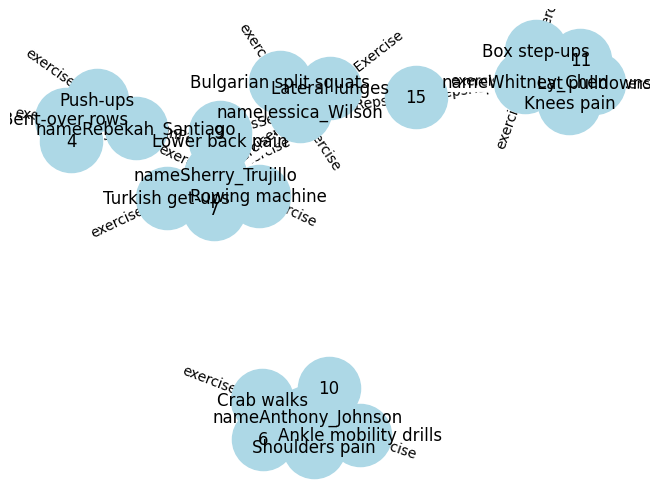

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph

# Add your RDF data here...

# Create a NetworkX graph
G = nx.Graph()

# Add nodes and edges from the RDF graph
for s, p, o in g:
    G.add_node(str(s))
    G.add_node(str(o))
    G.add_edge(str(s), str(o), label=str(p))

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue')
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [7]:
from rdflib import Graph, Namespace, URIRef, Literal
from faker import Faker
import random
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [8]:
# Extract data from the knowledge graph and convert it to a usable format
data = []
previous_ex = None
pain_area = None
recommended_ex = None
sets_sample = None
reps_sample = None
for subj, pred, obj in g:
    # Subject is predicate of object.
    # Extract data for each person
    if 'Pain' in pred:
        person = str(subj).split("/")[-1].replace("_", " ")
        pain_area = str(obj)
        previous_ex = None
        recommended_ex = None
    if 'PreviousExercise' in pred:
        previous_ex = str(obj)
    if 'RecommendedExercise' in pred:
        recommended_ex = str(obj)
    if 'Sets' in pred:
        sets_sample = str(obj)
    if "Reps" in pred:
        reps_sample = str(obj)

    if previous_ex and pain_area and recommended_ex and sets_sample and reps_sample:
        data.append([pain_area, previous_ex, recommended_ex, sets_sample, reps_sample])



# Convert the data to a DataFrame for machine learning
df = pd.DataFrame(data, columns=['Pain Area', 'Previous Exercise', 'Recommended Exercise', "Sets", "Reps"])

# Drop duplicates based on 'Pain Area', 'Previous Exercise', and 'Recommended Exercise'
df = df.drop_duplicates(subset=['Pain Area', 'Previous Exercise', 'Recommended Exercise'])


In [9]:
df.shape

(36613, 5)

In [10]:
df

,Pain Area,Previous Exercise,Recommended Exercise,Sets,Reps
0,Upper back pain,Kettlebell lunges,Sissy squats,11,5
1,Upper back pain,Stair climbing,Sissy squats,11,5
2,Upper back pain,Stair climbing,Lateral lunges,11,5
4,Upper back pain,Jumping jacks,Lateral lunges,1,5
5,Upper back pain,Hip thrusts,Lateral lunges,1,5
...,...,...,...,...,...
85213,Knees pain,Mountain climbers,Seated rows,6,8
85218,Knees pain,Mountain climbers,Plyo push-ups,10,2
85226,Lower back pain,Reverse lunges,Pec deck machine,12,7
85229,Upper back pain,Kettlebell snatches,Shrugs,9,4


In [11]:
# Encode categorical data for decision tree
le = preprocessing.LabelEncoder()
df['Pain Area'] = le.fit_transform(df['Pain Area'])
df['Previous Exercise'] = le.fit_transform(df['Previous Exercise'])
df['Recommended Exercise'] = le.fit_transform(df['Recommended Exercise'])


# Split the data into features and target variable
X = df[['Pain Area', 'Previous Exercise', "Sets", "Reps"]]
y = df['Recommended Exercise']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("We created the model. ")

We created the model. 


In [12]:
# Test the model
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Predicting a recommended exercise for new data
new_data = [[0, 1, 3, 4]]  # Example: 0 = 'Lower back pain', 1 = 'Stretching exercises'
predicted_exercise = clf.predict(new_data)
predicted_exercise_decoded = le.inverse_transform([predicted_exercise[0]])
print(f"Predicted Recommended Exercise: {predicted_exercise_decoded[0]}")

Model Accuracy: 1.28%
Predicted Recommended Exercise: Sumo deadlifts


/Users/jainilpatel/PycharmProjects/Exercise-Correction/.venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
import joblib

# Save the trained model
joblib.dump(clf, './decision_model/exercise_model.pkl')

# Save the label encoder
joblib.dump(le, './decision_model/label_encoder.pkl')

print("Model and label encoder saved successfully.")


Model and label encoder saved successfully.
